# Homework 1 (Alfredo Mijares)

* Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.

* Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.

* Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silved and gold, during the last year.

* Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.

In [100]:
using Latexify
using LaTeXStrings
using Plots
using Statistics
using PyCall
using PyCall
using DataFrames
using GLM
using Tables
using XLSX
using MLBase
using RDatasets
using LsqFit
using CSV
using DataFrames
using LinearAlgebra
using Images
using FFTW
using DSP
using ImageFiltering
using PlutoUI
using ImageFiltering, TestImages

In [101]:
dataBitcoin1 = CSV.read("BTC1.csv", DataFrame);
#println(dataBitcoin)
##println(dataBitcoin.Open)
N = size(dataBitcoin1.Open,1);
A = Array((1:N));
b = Array(dataBitcoin1.Open);
A = [ones(N,1) A];


## Solucion de la primera pregunta del Homework:

$A^T*A*x = A^T b$ 

Para que halla una solucion la matriz  $A^TA$ no puede ser singular. Sobre el valor del b, con la solucion:

$x = (A^T A)^{-1} A^T  b = A^+ b$

con $A^+ = (A^T A)^{-1} A^T$ vemos que el valor $b$ puede ser cualquier valor, con tal que cumple la igualdad.

In [102]:
plot(dataBitcoin1.Open)

# Solucion de la regresion lineal.

In [103]:

using Convex, SCS

b_t = ones(N)

# Create a (column vector) variable of size n x 1.
x_t = Variable(size(A,2))

# The problem is to minimize ||Ax - b||^2
# This can be done by: minimize(objective, constraints)
problem = minimize(square(norm(A * x_t - b_t)))

# Solve the problem by calling solve!
solve!(problem, SCS.Optimizer; silent_solver = true)

# Check the status of the problem
problem.status # :Optimal, :Infeasible, :Unbounded etc.

# Get the optimum value
p = x_t.value

2×1 Matrix{Float64}:
  0.999999975789648
 -3.621442166139172e-13

Usando mínimos cuadrados para determinar la relación entre el precio de bitcoin y los precios de tres materias primas, a saber, petróleo, plata y oro, durante el último año.
Para correlacionar el precio de la materia prima, use los indicadores de las empresas mas importante de cada rubro:

NEM (ORO) = Newmont Goldcorp es la compañía de oro líder en el mundo y un productor de cobre, plata, zinc y plomo. La cartera de activos, prospectos y talentos de clase mundial de la Compañía está anclada en jurisdicciones mineras favorables en América del Norte, América del Sur, Australia y África.

FRES (PLATA) = Fresnillo Plc, filial de la firma mexicana Industrias Peñoles (75% de propiedad), es una empresa minera de metales preciosos constituida en el Reino Unido y con sede en la Ciudad de México. Las actividades de Fresnillo incluyen exploración minera, desarrollo, construcción y operación.

SHI (PETROLEO) = China Petroleum and Chemical Corporation (NYSE: SNP), también conocida como Sinopec, es una de las tres compañías petroleras estatales de China y la compañía de petróleo y gas más grande de Asia Pacífico y del mundo por ingresos después de generar ingresos de $ 407 mil millones en el final del año fiscal 2019-20. También es la segunda empresa más grande que cotiza en las bolsas de EE. UU. En términos de ingresos, solo detrás de Walmart (NYSE: WMT).


In [104]:
dataBitcoin2 = CSV.read("NEM.csv", DataFrame);
dataBitcoin3 = CSV.read("FRES.csv", DataFrame);
dataBitcoin4 = CSV.read("SHI.csv", DataFrame);

N = size(dataBitcoin1.Open,1);
N1 = size(dataBitcoin2.Open,1);
N2 = size(dataBitcoin3.Open,1);
N3 = size(dataBitcoin4.Open,1);

XY=ones(4,254);
XB= ones(1,254); 

for i in 1:253

XY[1,i]= dataBitcoin2.Open[i];
XY[2,i]= dataBitcoin3.Open[i];
XY[3,i]= dataBitcoin4.Open[i];   
    
end


XB= dataBitcoin1.Open[1:254];

println("Aqui esta los BETAS para hacer su minimo cuadrados")
println("Beta1 es oro")
println("Beta2 es plata")
println("Beta3 es petroleo")
println("Beta4 es TERMINO INDEPENDIENTE")

beta1 = inv(XY*transpose(XY))*(XY*XB)

Aqui esta los BETAS para hacer su minimo cuadrados
Beta1 es oro
Beta2 es plata
Beta3 es petroleo
Beta4 es TERMINO INDEPENDIENTE


4-element Vector{Float64}:
   579.0154570917002
   -26.58213508141216
    74.26496503088856
 32753.411888050847

# Modelos no lineales aplicado al precio Bitcoin



In [105]:
Xojo = ones(1,366) 
Xojo = Array((1:N));
scatter(Xojo,dataBitcoin1.Open,legend=false)

In [106]:
@.model(x,p)=p[1]*x^6+p[2]*x^5+p[3]*x^4+p[4]*x^3+p[5]*x^2+p[6]*x^1+50000
po=[0.5,0.5,0.5,0.5,0.5,0.5]
myfit = curve_fit(model,Xojo,dataBitcoin1.Open,po)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([-3.0869066812041857e-9, 3.908777142253231e-6, -0.0018486496139509675, 0.39678517280350634, -36.684484701659265, 1023.249145302903], [-1739.7864929698771, 219.89346067107545, -2387.414925776764, -2443.971593312861, -1700.3099217395938, -2847.9393923880925, -3433.349039066532, -2892.667145230982, -2583.723289378948, -2454.680705665356  …  1041.5971552934498, 1818.8517950657406, 1863.8173347125485, 3040.5715991234174, 1363.7217000843375, 1835.8295044852493, 175.915217203903, 518.7773668285809, -183.12470184923586, -444.76881459134165], [0.9999996122171951 0.9999996122171951 … 0.9999999949323058 0.9999999998101611; 63.99999981376458 32.00000020727088 … 3.999999996106097 2.000000000207449; … ; 2.176782336e15 6.0466176e12 … 129599.99999830179 359.9999999974162; 2.2133149190661608e15 6.131066257800999e12 … 130320.99999774322 360.9999999978135], true, Float64[])

In [107]:
p= myfit.param
findyvals = p[1]*Xojo.^6+p[2]*Xojo.^5+p[3]*Xojo.^4+p[4]*Xojo.^3+p[5]*Xojo.^2+p[6]*Xojo.^1+50000*Xojo.^0
scatter(Xojo,dataBitcoin1.Open,legend=false)
plot!(Xojo,findyvals, lw = 3)

# Al resolver el problema de [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Aplicamos el problema de correlación de Kernel como lo plantea el articulo antes mencionado.


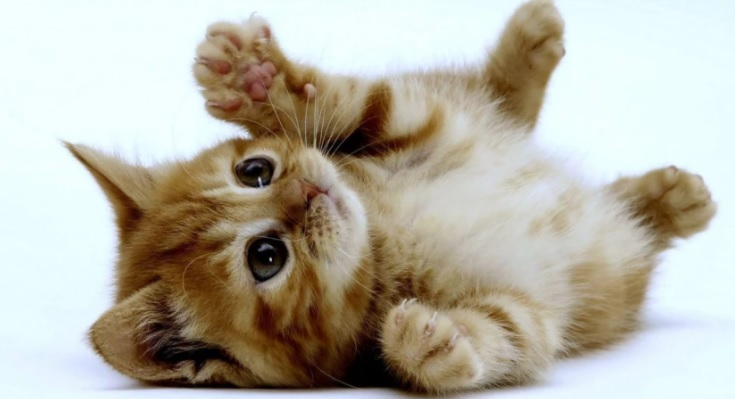

In [108]:
using Images
img = load("Gato.jpg")

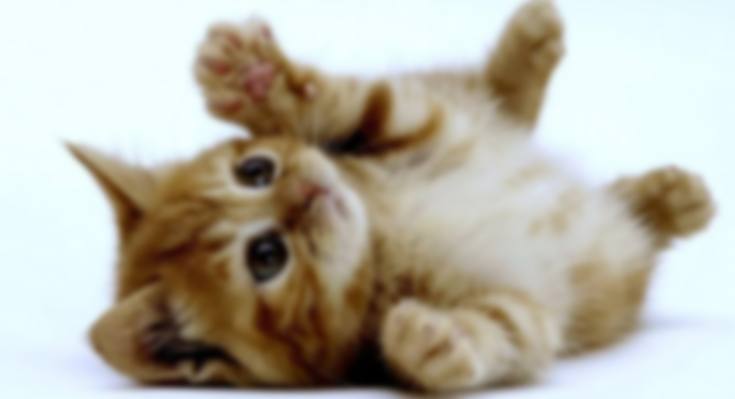

In [109]:
imgg = imfilter(img, Kernel.gaussian(3))

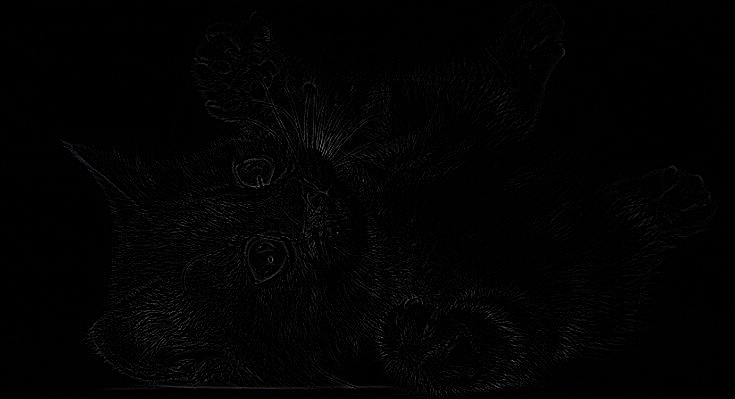

In [110]:
imgl = imfilter(img, Kernel.Laplacian())

# Otro ejemplo correlacion de Kernel.

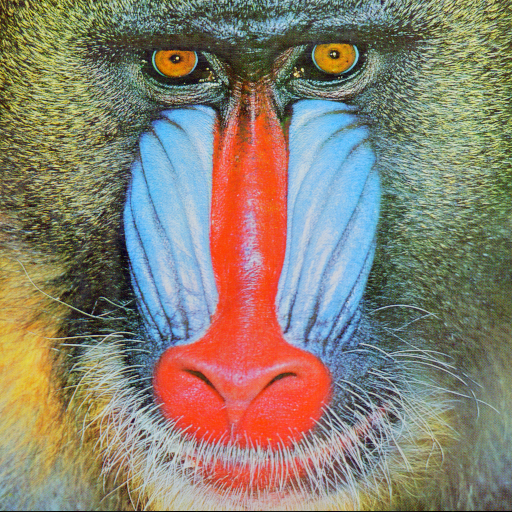

In [111]:
img = testimage("mandrill")

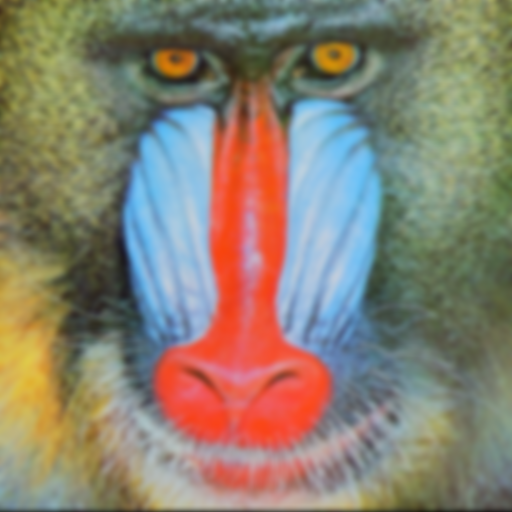

In [112]:
imgg = imfilter(img, Kernel.gaussian(3))

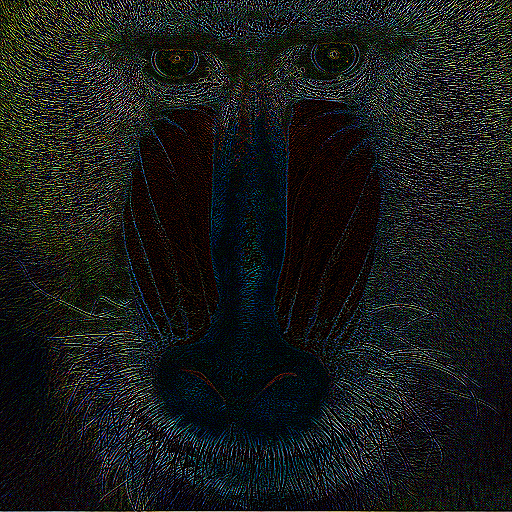

In [114]:
imgl = imfilter(img, Kernel.Laplacian())